### 支持的数据格式类型
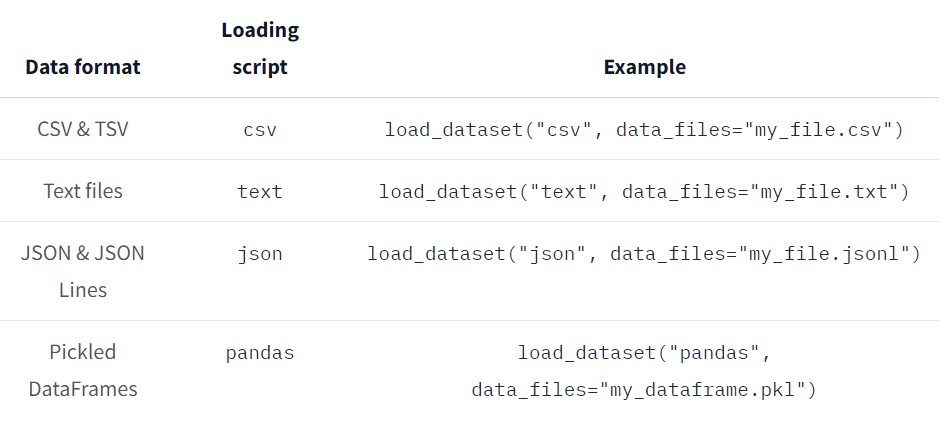

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

from datasets import load_dataset

squad_it_dataset = load_dataset("json", data_files="SQuAD_it-train.json", field="data")

Using custom data configuration default-36928326545d7d93
Reusing dataset json (C:\Users\Administrator\.cache\huggingface\datasets\json\default-36928326545d7d93\0.0.0\ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


A Jupyter Widget

In [2]:
squad_it_dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
})

In [3]:
squad_it_dataset["train"][0]

{'paragraphs': [{'context': "Il terremoto del Sichuan del 2008 o il terremoto del Gran Sichuan, misurato a 8.0 Ms e 7.9 Mw, e si è verificato alle 02:28:01 PM China Standard Time all' epicentro (06:28:01 UTC) il 12 maggio nella provincia del Sichuan, ha ucciso 69.197 persone e lasciato 18.222 dispersi.",
   'qas': [{'answers': [{'answer_start': 29, 'text': '2008'}],
     'id': '56cdca7862d2951400fa6826',
     'question': 'In quale anno si è verificato il terremoto nel Sichuan?'},
    {'answers': [{'answer_start': 232, 'text': '69.197'}],
     'id': '56cdca7862d2951400fa6828',
     'question': 'Quante persone sono state uccise come risultato?'},
    {'answers': [{'answer_start': 29, 'text': '2008'}],
     'id': '56d4f9902ccc5a1400d833c0',
     'question': 'Quale anno ha avuto luogo il terremoto del Sichuan?'},
    {'answers': [{'answer_start': 78, 'text': '8.0 Ms e 7.9 Mw'}],
     'id': '56d4f9902ccc5a1400d833c1',
     'question': 'Che cosa ha fatto la misura di sisma?'},
    {'answers'

数据读取详细说明文档：https://huggingface.co/docs/datasets/loading#local-and-remote-files

### 任务里也可以通过字典来指定数据集
- 比如咱们做一个train和一个test

In [4]:
data_files = {"train": "SQuAD_it-train.json", "test": "SQuAD_it-test.json"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Using custom data configuration default-9155b9914fb944bc
Reusing dataset json (C:\Users\Administrator\.cache\huggingface\datasets\json\default-9155b9914fb944bc\0.0.0\ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


A Jupyter Widget

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

药品评价数据集：https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

In [5]:
data_files = {"train": "drugsComTrain_raw.tsv", "test": "drugsComTest_raw.tsv"}
# \t 分隔符我们可以根据数据来指定
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

Using custom data configuration default-db9edb80a80dabfa
Reusing dataset csv (C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519)


A Jupyter Widget

In [6]:
#选择一小部分数据集：

drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))#采样
# Peek at the first few examples
drug_sample[:5]
#病人ID，症状...评分，评论

Loading cached shuffled indices for dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-2526dd30a4f6b17b.arrow


{'Unnamed: 0': [87571, 178045, 80482, 159268, 205477],
 'condition': ['Gout, Acute',
  'ibromyalgia',
  'Inflammatory Conditions',
  'Birth Control',
  'Depression'],
 'date': ['September 2, 2015',
  'November 7, 2011',
  'June 5, 2013',
  'October 21, 2010',
  'July 13, 2013'],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic', 'TriNessa', 'Pristiq'],
 'rating': [9.0, 3.0, 10.0, 10.0, 10.0],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30

### 数据集的基本处理操作
- 1.更换列名，把名字都写的好听好认识
- 2.将所有大写的都转换成小写
- 3.转换之前要注意先把所有的空值剔除掉
- 4.要计算每一个样本中评论的长度
- 5.对长度小于30的文本数据进行剔除
- 6.文本清洗去掉一些爬虫留下的痕迹
- 7.删除一些无用的列名，一般保存ID和标签之类的即可

更改列名

In [7]:
for split in drug_dataset.keys():
    assert len(drug_dataset[split]) == len(drug_dataset[split].unique("Unnamed: 0"))

In [8]:
drug_dataset = drug_dataset.rename_column(
    original_column_name="Unnamed: 0", new_column_name="patient_id"
)
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

In [9]:
drug_dataset.unique('condition')#统计所有不同的症状都有哪些

{'test': ['Depression',
  "Crohn's Disease, Maintenance",
  'Urinary Tract Infection',
  'Weight Loss',
  'Birth Control',
  'Keratosis',
  'Migraine Prevention',
  'Opiate Withdrawal',
  'Hot Flashes',
  'Vaginal Yeast Infection',
  'Schizoaffective Disorde',
  'Insomnia',
  'Narcolepsy',
  'Smoking Cessation',
  'Acne',
  'Bipolar Disorde',
  'Irritable Bowel Syndrome',
  'Keratoconjunctivitis Sicca',
  'Hyperhidrosis',
  'Panic Disorde',
  'Onychomycosis, Fingernail',
  'Rosacea',
  'Bowel Preparation',
  'Constipation, Drug Induced',
  None,
  'Diabetes, Type 2',
  'Pain',
  'Lipodystrophy',
  'Alcohol Dependence',
  'Emergency Contraception',
  'Major Depressive Disorde',
  'Anxiety',
  'Bladder Infection',
  'Benign Prostatic Hyperplasia',
  'Rheumatoid Arthritis',
  'Endometriosis',
  'ADHD',
  'Restless Legs Syndrome',
  'Conjunctivitis, Allergic',
  "Raynaud's Syndrome",
  'Schizophrenia',
  'Diabetes, Type 1',
  'Kidney Infections',
  'Generalized Anxiety Disorde',
  'Obesity

In [10]:
def lowercase_condition(example):
    return {"condition": example["condition"].lower()}


drug_dataset.map(lowercase_condition)

A Jupyter Widget

AttributeError: 'NoneType' object has no attribute 'lower'

NoneType表示读取的数据是空的

In [11]:
drug_dataset = drug_dataset.filter(lambda x: x["condition"] is not None)#剔除掉一些空值
drug_dataset

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-3e761059a643413c.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-a7da7c430d0ede96.arrow


DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 160398
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53471
    })
})

In [12]:
drug_dataset = drug_dataset.map(lowercase_condition)
# 执行小写的任务
drug_dataset["train"]["condition"][:3]

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-405e42d1ce9d4796.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-db273f7b15aeafb5.arrow


['left ventricular dysfunction', 'adhd', 'birth control']

统计每一条评论的长度，别生成一个新的字段

In [13]:
drug_dataset["train"][0]

{'condition': 'left ventricular dysfunction',
 'date': 'May 20, 2012',
 'drugName': 'Valsartan',
 'patient_id': 206461,
 'rating': 9.0,
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'usefulCount': 27}

In [14]:
def compute_review_length(example):
    return {"review_length": len(example["review"].split())}

In [15]:
drug_dataset = drug_dataset.map(compute_review_length)#返回值是字典，加了一列，也可以参考Dataset.add_column()
# 打印
drug_dataset["train"][0]

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-5c7e22f3649c67e2.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-c69934e206b94d38.arrow


{'condition': 'left ventricular dysfunction',
 'date': 'May 20, 2012',
 'drugName': 'Valsartan',
 'patient_id': 206461,
 'rating': 9.0,
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'review_length': 17,
 'usefulCount': 27}

In [16]:
drug_dataset["train"].sort("review_length")[:3]#按长度排序

Loading cached sorted indices for dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-7001b850403a9c05.arrow


{'condition': ['birth control', 'muscle spasm', 'pain'],
 'date': ['November 4, 2008', 'March 24, 2017', 'August 20, 2016'],
 'drugName': ['Loestrin 21 1 / 20', 'Chlorzoxazone', 'Nucynta'],
 'patient_id': [103488, 23627, 20558],
 'rating': [10.0, 1.0, 6.0],
 'review': ['"Excellent."', '"useless"', '"ok"'],
 'review_length': [1, 1, 1],
 'usefulCount': [5, 2, 10]}

过短的对咱们建模没啥用，直接剔除掉

In [17]:
drug_dataset = drug_dataset.filter(lambda x: x["review_length"] > 30)
print(drug_dataset.num_rows)

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-bf3a9231333f5538.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-bf5f6c9eed13d296.arrow


{'train': 138514, 'test': 46108}


排序的一些API使用方法：https://huggingface.co/docs/datasets/package_reference/main_classes#datasets.Dataset.sort

In [18]:
drug_dataset["train"].sort("review_length")[:3]#按长度排序

Loading cached sorted indices for dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-6d437f72afafeee3.arrow


{'condition': ['depression', 'pain', 'constipation'],
 'date': ['September 3, 2017', 'April 3, 2009', 'October 21, 2015'],
 'drugName': ['Sertraline', 'Duragesic', 'Dulcolax'],
 'patient_id': [63851, 110702, 125327],
 'rating': [9.0, 9.0, 10.0],
 'review': ['"I&#039;ve been on Serdep 50mg for nearly 3 weeks and feeling so much better. I&#039;ve been on Lorien before, but didn&#039;t help. My emotional status and irritability is so much better."',
  '"This patch has been the most effective in treating my spinal pain, however due to a change in work and traveling extensively the restrictions about getting a refill is hard. "',
  '"I had to take triple the amount to get any relief and it made me violently ill for two days.  It took three days before I could eat solid food again!"'],
 'review_length': [31, 31, 31],
 'usefulCount': [21, 39, 9]}

接下来还需要处理一些爬虫留下的问题

In [19]:
import html #直接调包就行

text = "I&#039;m a transformer called BERT"
html.unescape(text)

"I'm a transformer called BERT"

In [20]:
drug_dataset = drug_dataset.map(lambda x: {"review": html.unescape(x["review"])})

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-2f6d51a4b39237b8.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-890ab31ae4b3910f.arrow


使用batched=True能加速，他的默认值1000

In [21]:
new_drug_dataset = drug_dataset.map(
    lambda x: {"review": [html.unescape(o) for o in x["review"]]}, batched=True
)

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-c66aed35bcefe8ff.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-8e7bdc3631892f82.arrow


In [22]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

return_overflowing_tokens=True 会返回一个序列

In [23]:
def tokenize_and_split(examples):
    return tokenizer(
        examples["review"],
        truncation=True,
        max_length=128,
        return_overflowing_tokens=True,#如果一句话超过了长度，会展开成多句话
    )

In [24]:
drug_dataset["train"][0]

{'condition': 'adhd',
 'date': 'April 27, 2010',
 'drugName': 'Guanfacine',
 'patient_id': 95260,
 'rating': 8.0,
 'review': '"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."',
 'review_length': 141,
 'usefulCount': 192}

In [25]:
result = tokenize_and_split(drug_dataset["train"][0])
[len(inp) for inp in result["input_ids"]]

[128, 49]

得到了两个输入

In [27]:
for x in result["input_ids"][:2]:
    print(tokenizer.decode(x))

[CLS] " My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation ( very unusual for him. ) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever [SEP]
[CLS]. He is less emotional ( a good thing ), less cranky. He is remembering all the things he should. Overall his behavior is better. We have tried many different medications and so far this is the most effective. " [SEP]


In [28]:
drug_dataset["train"].column_names

['patient_id',
 'drugName',
 'condition',
 'review',
 'rating',
 'date',
 'usefulCount',
 'review_length']

In [31]:
tokenized_dataset = drug_dataset.map(
    tokenize_and_split, batched=True, remove_columns=drug_dataset["train"].column_names
)

Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-c6eb7cd9a67a5b1b.arrow
Loading cached processed dataset at C:\Users\Administrator\.cache\huggingface\datasets\csv\default-db9edb80a80dabfa\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519\cache-1e7b2f1559f14ee7.arrow


去掉一些没用的列名，因为实际输入模型的只是这些IP和一些标识符就可以了

In [32]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping'],
        num_rows: 206772
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping'],
        num_rows: 68876
    })
})

如果不习惯huggingface这套map的方法，也可以先用pandas处理好后再进行建模

In [33]:
drug_dataset.set_format("pandas")
drug_dataset["train"][:3]

,patient_id,drugName,condition,review,rating,date,usefulCount,review_length
0,95260,Guanfacine,adhd,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,141
1,92703,Lybrel,birth control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,134
2,138000,Ortho Evra,birth control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,89


### 都转成pandas那不想咋玩就咋玩了嘛

In [34]:
train_df = drug_dataset["train"][:]

In [35]:
frequencies = (
    train_df["condition"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "condition", "condition": "frequency"})
)
frequencies.head()

,condition,frequency
0,birth control,27655
1,depression,8023
2,acne,5209
3,anxiety,4991
4,pain,4744


### 分析完了，记得转回去

In [36]:
from datasets import Dataset

freq_dataset = Dataset.from_pandas(frequencies)
freq_dataset

Dataset({
    features: ['condition', 'frequency'],
    num_rows: 819
})

切分数据集

In [37]:
drug_dataset.reset_format()#"pandas" to "arrow"
drug_dataset_clean = drug_dataset["train"].train_test_split(train_size=0.8, seed=42)
drug_dataset_clean

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
})

In [38]:
# 把名字改一下，咱们叫验证集
drug_dataset_clean["validation"] = drug_dataset_clean.pop("test")
drug_dataset_clean

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
})

In [39]:
# 测试集还是原来的
drug_dataset_clean["test"] = drug_dataset["test"]
drug_dataset_clean

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})

费这么大劲处理个数据，别忘了把处理好的保存下

In [40]:
drug_dataset_clean.save_to_disk("drug-reviews")

A Jupyter Widget

A Jupyter Widget

这样后续读取的时候就可以直接读我们预处理好的数据了

In [41]:
from datasets import load_from_disk

drug_dataset_reloaded = load_from_disk("drug-reviews")
drug_dataset_reloaded

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 110811
    })
    validation: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 27703
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length'],
        num_rows: 46108
    })
})